One of the important applications of classification techniques in marketing analytics lies in predicting whether
individual customers will defect to a competitor over a fixed time period (e.g. over the next year). Your goal is to
build the best model possible to predict churn. In this problem you will use the “churn_data.csv” file to make these
kinds of predictions, and you will implement a Jupyter notebook to accomplish this. Please make sure your Jupyter
notebook addresses the questions with appropriate discussion (i.e. you will want to include appropriate discussion
around your code).

1) Load the “churn_data.csv” dataset into Python. What is the response variable, and what are the predictor variables?
The response variable is Churn_Yes/Churn_No and the predictor variables are all the other variables excluding customerID.

2) What data transforms are necessary to perform on this data and why?
One-hot encoding then removing the Churn_Yes and Churn_No since it is what we are trying to predict. We also remove CustID because it tells us nothing as well as the Genders because it lowers accuracy.

3) What modeling approaches did you use and why? Describe your model development process, including the different models tried, feature selection methods, and the different transformation techniques you employed. (**NOTE: Please do not forget to use your KNN algorithm from part 1 as one of your methods).

4) Which error metrics did you use to assess performance and why? What kind of performance did you obtain on the different models you built?
I am using Mean Square Error, Mean Absolute Error, R^2, AND Explained Variance Score. With linear regression the model was wrong about 32% percent of the time - judging by mean absolute error of the validation set.

5) Construct the best (i.e. least-error) possible model on this data set. What are the predictors used?
The predictors are everything besides CustID, and gender.

6) Load the dataset “churn_validation.csv” into a new data frame and recode as necessary. Predict the outcomes for each of the customers and compare to the actual. What are the error rates you get based on your selected metrics?
68% correct, 32% incorrect.

7) Consider the best model you built for this problem. Is it a good model that can reliably be used for prediction? Why or why not?
No it's only slightly better than purely guessing. I did not spend much time working on this assignment as I believe I could pass with a 0% on Assignment 3.

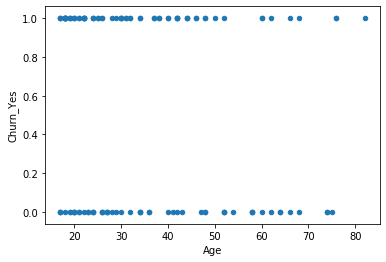

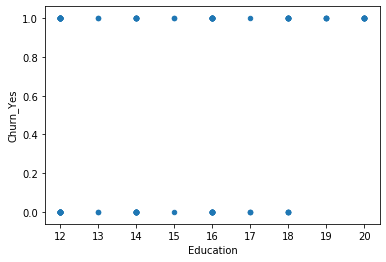

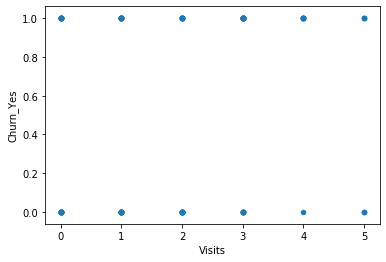

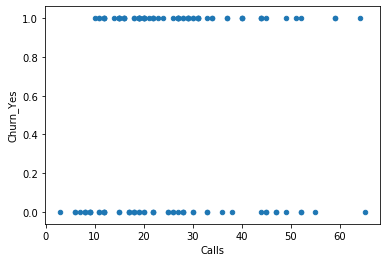

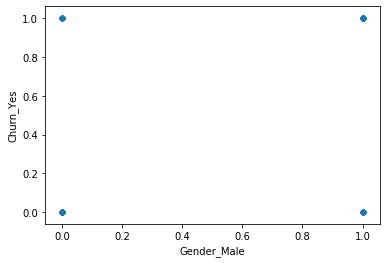

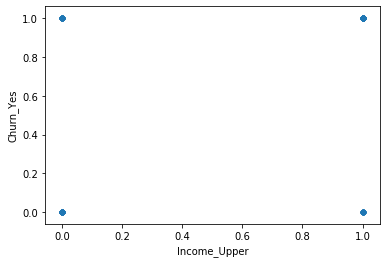

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import pprint
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from data_util import *
from sklearn.linear_model import LogisticRegression
import numpy as np 
from knn import * # Import your knn class
df_train = pd.read_csv('../data/churn_data.csv')

# Transform categorical variables into one-hot-encoded format
df_train = pd.get_dummies(df_train, columns=cat_features(df_train))

features = list(df_train)  

# Check correlation with the above ground living area
elem = 'Age'
info = pd.concat([df_train['Churn_Yes'], df_train[elem]], axis=1)
info.plot.scatter(x=elem, y='Churn_Yes');

# Check correlation with the above ground living area
elem = 'Education'
info = pd.concat([df_train['Churn_Yes'], df_train[elem]], axis=1)
info.plot.scatter(x=elem, y='Churn_Yes');

# Check correlation with the above ground living area
elem = 'Visits'
info = pd.concat([df_train['Churn_Yes'], df_train[elem]], axis=1)
info.plot.scatter(x=elem, y='Churn_Yes');

# Check correlation with the above ground living area
elem = 'Calls'
info = pd.concat([df_train['Churn_Yes'], df_train[elem]], axis=1)
info.plot.scatter(x=elem, y='Churn_Yes');

# Check correlation with the above ground living area
elem = 'Gender_Male'
info = pd.concat([df_train['Churn_Yes'], df_train[elem]], axis=1)
info.plot.scatter(x=elem, y='Churn_Yes');

# Check correlation with the above ground living area
elem = 'Income_Upper'
info = pd.concat([df_train['Churn_Yes'], df_train[elem]], axis=1)
info.plot.scatter(x=elem, y='Churn_Yes');

features.remove('Churn_Yes')
features.remove('Churn_No')
features.remove('Gender_Male')
features.remove('Gender_Female')
#features.remove('Income_Lower')
#features.remove('Income_Upper')
#features.remove('FamilySize')
#features.remove('Visits')
features.remove('CustID')
data_x = df_train[features]
data_y = df_train['Churn_Yes']

In [124]:
data_x.head()

,Age,FamilySize,Education,Calls,Visits,Income_Lower,Income_Upper
0,34,4,16,14,5,1,0
1,20,5,14,49,1,1,0
2,30,4,20,19,4,1,0
3,46,4,14,15,4,1,0
4,23,4,16,18,0,1,0


In [125]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=4)

## Trying out a linear regression model

In [132]:
base_mod = linear_model.LinearRegression()

base_mod.fit(x_train, y_train)
preds = base_mod.predict(x_test)
print_regression_error_report(preds, y_test)

MSE, MAE, R^2, EVS: [0.15741867033493176, 0.3725665940769028, -1.8182877285523706, -0.8794118417190411]


In [133]:
k = KNN()
k.fit(x_train, y_train, x_test, y_test)

------------ EVALUATING MODEL: k =1 -----------------
Accuracy: 0.7142857142857143
Precison: 0.5
Recall: 0.5
F1: 0.5
ROC AUC: 0.6500000000000001
Confusion Matrix:
[[4 1]
 [1 1]]
------------ EVALUATING MODEL: k =3 -----------------
Accuracy: 0.5714285714285714
Precison: 0.0
Recall: 0.0
F1: 0.0
ROC AUC: 0.4
Confusion Matrix:
[[4 1]
 [2 0]]
------------ EVALUATING MODEL: k =5 -----------------
Accuracy: 0.8571428571428571
Precison: 0.6666666666666666
Recall: 1.0
F1: 0.8
ROC AUC: 0.9
Confusion Matrix:
[[4 1]
 [0 2]]
------------ EVALUATING MODEL: k =7 -----------------
Accuracy: 0.8571428571428571
Precison: 0.6666666666666666
Recall: 1.0
F1: 0.8
ROC AUC: 0.9
Confusion Matrix:
[[4 1]
 [0 2]]
------------ EVALUATING MODEL: k =9 -----------------
Accuracy: 0.7142857142857143
Precison: 0.0
Recall: 0.0
F1: 0.0
ROC AUC: 0.5
Confusion Matrix:
[[5 0]
 [2 0]]
------------ EVALUATING MODEL: k =11 -----------------
Accuracy: 0.8571428571428571
Precison: 1.0
Recall: 0.5
F1: 0.6666666666666666
ROC AUC

C:\Users\Josh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Josh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Josh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Josh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Josh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedM

## Validation

In [127]:
df_validate = pd.read_csv('../data/churn_validation.csv')
df_validate = pd.get_dummies(df_validate, columns=cat_features(df_validate))

features2 = list(df_validate)  
features2.remove('Churn_Yes')
features2.remove('Churn_No')
features2.remove('Gender_Male')
features2.remove('Gender_Female')
#features2.remove('Income_Lower')
#features2.remove('Income_Upper')
#features2.remove('Visits')
#features2.remove('FamilySize')
features2.remove('CustID')
data_x2 = df_validate[features2]
data_y2 = df_validate['Churn_Yes']


In [128]:
data_x2.head()

,Age,FamilySize,Education,Calls,Visits,Income_Lower,Income_Upper
0,54,4,18,48,3,0,1
1,21,4,19,44,2,1,0
2,22,3,16,22,5,1,0
3,27,3,13,19,2,0,1
4,18,2,14,6,3,1,0


In [129]:
x_train, x_test, y_train, y_test = train_test_split(data_x2, data_y2, test_size=0.2, random_state=4)

preds = base_mod.predict(x_test) #put in a validation set of data
print_regression_error_report(preds, y_test)

MSE, MAE, R^2, EVS: [0.10724536824951943, 0.32313568939244364, -3.340261107372985, -2.903973000130598]
